# Week 11-12: Continuous Time Markov Chains

In the third chapter of the course, we focus on Continuous Time Markov Chains, which generalize the Poisson process and are a continuous-time analog of the Discrete Time Markov Chain studied in Chapter 1.

In this notebook, we will first focus on how to simulate these processes. 

In class, we have seen that we can define the process from the transition matrix $Q = (q_{i,j})$. Let's write down the transition matrix associated with the process described in Problem 4 of the homework: We have for this process $v_0=\lambda$, $v_1=\mu_1$ and $v_2=\mu_2$, $p_{0,1}=p$, $p_{0,2}=1-p$, $p_{1,2}=p_{2,1}=0$ and $p_{2,0}=p_{1,0}=1$. As an exercise, enter the values of the state space $S$ and corresponding transition matrix $Q$ for $p=0.5$, $\lambda=1$, $\mu_1=2$ and $\mu_2=3$.

In [100]:
import numpy as np
S = # enter the state space
Q = # enter the matrix Q
P = # enter the matrix of p_{ij}

To simulate the process, we need to first simulate the time to the next jump and the state the process will jump to. Complete the following code to generate one trajectory of the process.

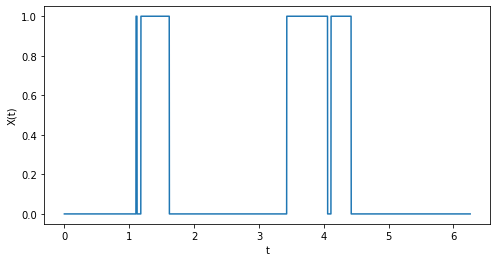

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# specify global variables
N_traj = 1
nsteps = 10                # number of transitions to simulate
xstates = np.zeros(nsteps, dtype=int) # record the states
tjumps = np.zeros(nsteps)  # record the jump times
xstates[0] = 0             # initial state
tjumps[0] = 0              # initial time


# The following function simulates the process
def simulate_process(xstates, tjumps, nsteps):
    for tidx in range(nsteps - 1):
        current_state = xstates[tidx]
        # update the jump time array
        rate =   #ENTER the rate of the Exponential time of the next jump, as a function of Q
        tjumps[tidx + 1] = tjumps[tidx] + np.random.exponential(1 / rate)
        # update the next state as a function of P
        #see also https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
        xstates[tidx + 1] = np.random.choice(S, 1, p= ) #COMPLETE with the correct distribution, as a function of P
           
        
# use the function
simulate_process(xstates, tjumps, nsteps)
    
# plot of one trajectory
def current_state(tval, tjumps):
    for i in range(0, len(tjumps) - 1):
        if  tjumps[i] <= tval < tjumps[i + 1]:
            return xstates[i]
        
t = np.linspace(0, tjumps[-1] + 2, num=10000)
x = np.zeros(len(t))
for k in range(0, len(t)):
    x[k] = current_state(t[k], tjumps)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("t")
ax.set_ylabel("X(t)")
ax.plot(t, x)
plt.show()

By simulating the Markov chain over a long time, we can empirically obtain the stationary distribution of the process (if it exists) by extracting the average fraction of time spent in each state (cf. class). Run the following script to empirically estimate the stationary distribution

In [102]:
nsteps = 10000
xstates = np.zeros(nsteps, dtype=int)
tjumps = np.zeros(nsteps) 
simulate_process(xstates, tjumps, nsteps)

# stationary distribution
pi = np.zeros(3)

# add the time intervals the process X(t) spends in each state
for tidx in range(nsteps - 1):
    if xstates[tidx] == 0:
        pi[0] += tjumps[tidx + 1] - tjumps[tidx]
    elif xstates[tidx] == 1:
        pi[1] += tjumps[tidx + 1] - tjumps[tidx]
    elif xstates[tidx] == 2:
        pi[2] += tjumps[tidx + 1] - tjumps[tidx]

# normalize stationary distribution pi
pi = pi / tjumps[nsteps - 1]

print("The empirical stationary distribution is pi =", pi, ".")

The empirical stationary distribution is pi = [0.70577954 0.17497455 0.11924591] .


Compare these results with the theoretical stationary distribution:

The theoretical stationary distribution is P = [0.7058823529411764, 0.1764705882352941, 0.1176470588235294] .


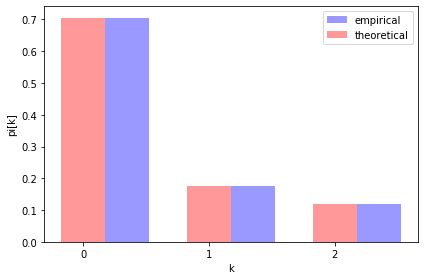

In [103]:
# enter the values of lambda, mu_1, mu_2 and p
lmbda = 
mu1 = 
mu2 = 
p = 

P = [ , , ] # ENTER the theoretical stationary distribution P

print("The theoretical stationary distribution is P =", P, ".")

# visually compare empirical with theoretical distr.
opacity = 0.4
bar_width = 0.35

plt.xlabel('k')
plt.ylabel('pi[k]')
plt.xticks(range(3),("0", "1", "2"))
plt.bar(np.arange(3)+ bar_width, pi, bar_width, align="center", alpha=opacity, color="b", label="empirical")
plt.bar(range(3), P, bar_width, align="center", alpha=opacity, color="r", label="theoretical")
plt.legend()
plt.tight_layout()
plt.show()

# Homework Problems

1. Simulate the chain corresponding with Problems 1-3. 

In [ ]:
# note to TA, for the solution, simply write the matrix Q

2. Simulate a birth death process with birth rate $\lambda$ and death rate $\mu$ (the state space is infinite so we cannot define the matrix $Q$, but we can still use a similar algorithm by simulating the time of the next jump and if it is a birth or a death event).